<a href="https://colab.research.google.com/github/mrtkp9993/QuantitaveFinanceExamplesPy/blob/main/05_volatility_volume_relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [123]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [105]:
thyao = yf.download("THYAO.IS", period = "max", start = "2020-01-02")
thyao.drop(['Close'], axis=1, inplace=True)
thyao.rename(columns={'Adj Close':'Close'}, inplace=True)
thyao

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,14.50,14.84,14.48,14.83,109370878
2020-01-03,14.67,14.73,14.09,14.27,153873531
2020-01-06,14.03,14.08,13.50,13.57,136423179
2020-01-07,13.79,13.86,13.52,13.54,154729229
2020-01-08,13.05,13.62,13.03,13.50,197012716
...,...,...,...,...,...
2021-08-24,12.55,12.85,12.53,12.81,115259132
2021-08-25,12.79,12.95,12.47,12.50,133481635
2021-08-26,12.70,12.90,12.61,12.79,130016212


In [106]:
# True Range as Volatility proxy
thyao['TR'] = thyao.Close - thyao.Open

In [107]:
# Normalize volume and tr for each day by 
# subtracting the mean of the last 20 days 
# and dividing by the last 20 days’ standard 
# deviation for each
thyao['TR_norm'] = np.nan
thyao['Vol_norm'] = np.nan 

In [114]:
for i in range(22, len(thyao)):
  data = thyao.iloc[i-22:i, [4,5]]
  
  Vol_mean = np.mean(data.Volume)
  Vol_stdd = np.std(data.Volume)
  TR_mean = np.mean(data.TR)
  TR_stdd = np.std(data.TR)
  
  thyao.loc[thyao.index[i], "Vol_norm"] = (thyao.loc[thyao.index[i], "Volume"] - Vol_mean) / Vol_stdd
  thyao.loc[thyao.index[i], "TR_norm"] = (thyao.loc[thyao.index[i], "TR"] - TR_mean) / TR_stdd

thyao.dropna(inplace=True)

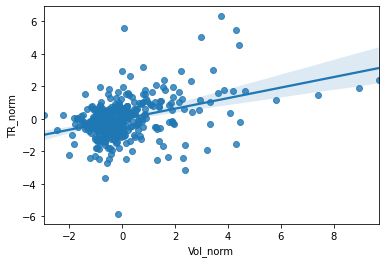

In [117]:
# Scatter plot with regression line
sns.regplot(data=thyao, x="Vol_norm", y="TR_norm", )

In [124]:
# OLS
lm = OLS(thyao.TR_norm, add_constant(thyao.Vol_norm))
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TR_norm   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     67.86
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           2.68e-15
Time:                        07:34:30   Log-Likelihood:                -604.58
No. Observations:                 392   AIC:                             1213.
Df Residuals:                     390   BIC:                             1221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0198      0.057     -0.346      0.730      -0.133       0.093
Vol_norm       0.3242      0.039      8.238      0.000       0.247       0.402
==============================================================================
Omnibus:                       49.992   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.561
Skew:                           0.101   Prob(JB):                     1.03e-82
Kurtosis:                       7.804   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""